In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df= pd.read_csv(r'C:\Univ\3rd Semester\Data science\datasets\mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

### The usage of chi square test find the correlation between categorical columns and numerical columns or between categorical columns can be established by using the below functions

In [4]:
import scipy.stats as ss
from collections import Counter
from dython._private import convert, remove_incomplete_samples, replace_nan_with_value
REPLACE = 'replace'
DROP = 'drop'
DROP_SAMPLES = 'drop_samples'
DROP_FEATURES = 'drop_features'
SKIP = 'skip'
DEFAULT_REPLACE_VALUE = 0.0
import math
def theils_u(x, y, nan_strategy=REPLACE, nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-categorical association.
    This is the uncertainty of x given y: value is on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.
    This is an asymmetric coefficient: U(x,y) != U(y,x)
    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
    **Returns:** float in the range of [0,1]
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples with missing values, or 'replace'
        to replace all missing values with the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when nan_strategy is set to 'replace'.
    """
    if nan_strategy == REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == DROP:
        x, y = remove_incomplete_samples(x, y)
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

def conditional_entropy(x, y, nan_strategy=REPLACE, nan_replace_value=DEFAULT_REPLACE_VALUE):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    **Returns:** float
    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples with missing values, or 'replace'
        to replace all missing values with the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when nan_strategy is set to 'replace'.
    """
    if nan_strategy == REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == DROP:
        x, y = remove_incomplete_samples(x, y)
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True, return_results=False, nan_strategy=REPLACE, nan_replace_value=DEFAULT_REPLACE_VALUE, **kwargs):
    """
    Calculate the correlation/strength-of-association of features in data-set with both categorical (eda_tools) and
    continuous features using:
     * Pearson's R for continuous-continuous cases
     * Correlation Ratio for categorical-continuous cases
     * Cramer's V or Theil's U for categorical-categorical cases
    **Returns:** a DataFrame of the correlation/strength-of-association between all features
    Parameters
    ----------
    dataset : NumPy ndarray / Pandas DataFrame
        The data-set for which the features' correlation is computed
    nominal_columns : string / list / NumPy ndarray
        Names of columns of the data-set which hold categorical values. Can also be the string 'all' to state that all
        columns are categorical, or None (default) to state none are categorical
    mark_columns : Boolean, default = False
        if True, output's columns' names will have a suffix of '(nom)' or '(con)' based on there type (eda_tools or
        continuous), as provided by nominal_columns
    theil_u : Boolean, default = False
        In the case of categorical-categorical feaures, use Theil's U instead of Cramer's V
    plot : Boolean, default = True
        If True, plot a heat-map of the correlation matrix
    return_results : Boolean, default = False
        If True, the function will return a Pandas DataFrame of the computed associations
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop_samples' to remove samples with missing values,
        'drop_features' to remove features (columns) with missing values, or 'replace' to replace all missing
        values with the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when nan_strategy is set to 'replace'
    kwargs : any key-value pairs
        Arguments to be passed to used function and methods
    """
    dataset = convert(dataset, 'dataframe')
    if nan_strategy == REPLACE:
        dataset.fillna(nan_replace_value, inplace=True)
    elif nan_strategy == DROP_SAMPLES:
        dataset.dropna(axis=0, inplace=True)
    elif nan_strategy == DROP_FEATURES:
        dataset.dropna(axis=1, inplace=True)
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0,len(columns)):
        for j in range(i,len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]], dataset[columns[j]], nan_strategy=SKIP)
                            corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]], dataset[columns[i]], nan_strategy=SKIP)
                        else:
                            cell = cramers_v(dataset[columns[i]], dataset[columns[j]], nan_strategy=SKIP)
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]], nan_strategy=SKIP)
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]], nan_strategy=SKIP)
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in columns]
        corr.columns = marked_columns
        corr.index = marked_columns
    if plot:
        plt.figure(figsize=kwargs.get('figsize',None))
        sns.heatmap(corr, annot=kwargs.get('annot',True), fmt=kwargs.get('fmt','.2f'))
        plt.show()
    if return_results:
        return corr

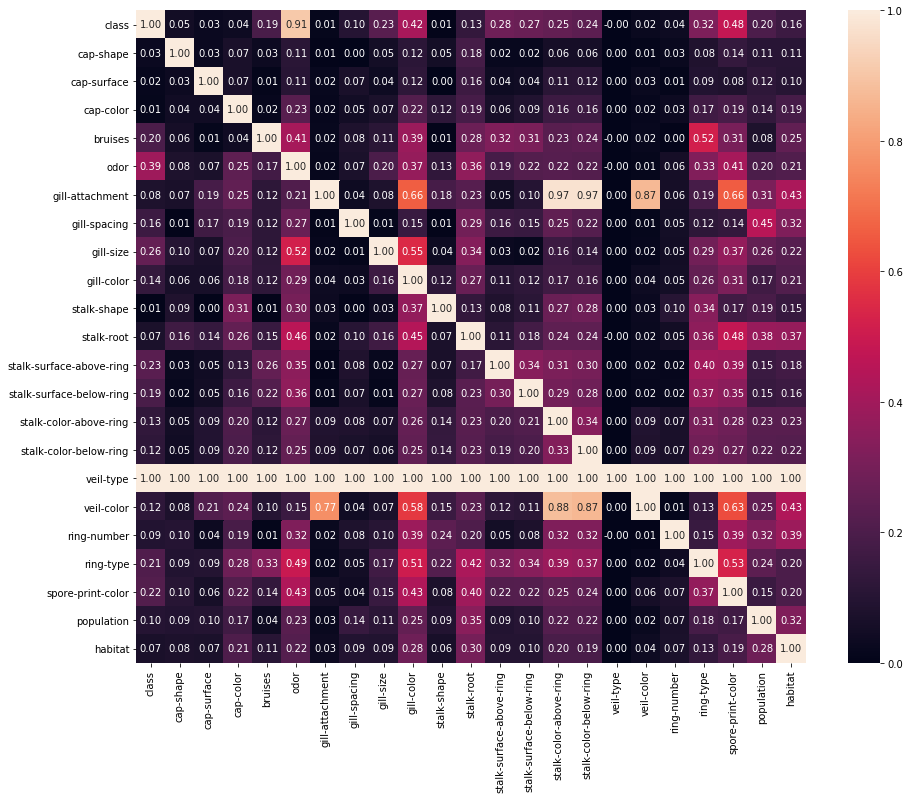

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.048842,0.028617,0.036083,0.192559,0.906920,0.014178,0.100977,0.230369,0.417367,...,0.272148,0.254082,0.241641,-1.603208e-16,0.023839,0.038489,0.318318,0.481153,0.202146,0.156980
cap-shape,0.029522,1.000000,0.030204,0.067283,0.033847,0.112945,0.007299,0.002815,0.053098,0.116157,...,0.019701,0.058215,0.055384,0.000000e+00,0.009188,0.025199,0.084951,0.137079,0.109311,0.105852
cap-surface,0.018147,0.031688,1.000000,0.070244,0.008368,0.105770,0.020496,0.067561,0.038540,0.121633,...,0.043278,0.111544,0.116047,0.000000e+00,0.026409,0.009376,0.091641,0.084752,0.124042,0.102367
cap-color,0.014361,0.044305,0.044089,1.000000,0.016110,0.227037,0.017327,0.049105,0.072013,0.217754,...,0.087859,0.156924,0.158050,1.276193e-16,0.018796,0.031888,0.170940,0.190981,0.136673,0.187076
bruises,0.196440,0.057126,0.013462,0.041292,1.000000,0.410174,0.020811,0.078857,0.110296,0.385391,...,0.311460,0.230271,0.239786,-1.635524e-16,0.019803,0.004893,0.515786,0.306383,0.078976,0.252096
odor,0.390648,0.080488,0.071845,0.245707,0.173188,1.000000,0.015647,0.073545,0.199184,0.374005,...,0.217931,0.224389,0.217475,-2.762272e-16,0.013025,0.058201,0.325987,0.410462,0.197671,0.214808
gill-attachment,0.081818,0.069684,0.186513,0.251221,0.117721,0.209629,1.000000,0.038487,0.080954,0.661019,...,0.098711,0.974405,0.974405,2.312891e-16,0.869167,0.058504,0.185867,0.659893,0.312008,0.425226
gill-spacing,0.158154,0.007295,0.166868,0.193235,0.121069,0.267419,0.010446,1.000000,0.014241,0.152050,...,0.148734,0.249324,0.220339,0.000000e+00,0.013552,0.052528,0.118140,0.136083,0.454470,0.321471
gill-size,0.257946,0.098364,0.068052,0.202591,0.121059,0.517777,0.015708,0.010181,1.000000,0.549872,...,0.020705,0.158643,0.136444,0.000000e+00,0.016174,0.049195,0.292209,0.368778,0.256686,0.224494
gill-color,0.137597,0.063356,0.063236,0.180369,0.124545,0.286253,0.037764,0.032005,0.161900,1.000000,...,0.122847,0.165376,0.164199,0.000000e+00,0.037790,0.053718,0.256657,0.313553,0.168101,0.212241


In [5]:
associations(df, nominal_columns='all', mark_columns=False, theil_u=True, plot=True, return_results=True,figsize=(15,12))